# Modelos de Classificação e Regressão Logística - Desafio Final

Bootcamp Data Analytics 2024

*Autor: Letícia Simões*

## Bibliotecas

In [75]:
# Bibliotecas usadas
from sklearn                 import datasets
from sklearn                 import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression

import pandas            as pd
import numpy             as np
import statsmodels.api   as sm
import matplotlib.pyplot as plt
import seaborn           as sns
import scipy.stats       as stats

import warnings
warnings.simplefilter(action='ignore')

## Proposta do Desafio - Parte I

**Utilizando o dataset `Iris` da biblioteca sklearn, responda às perguntas abaixo.**



![Flores de Íris](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Flores_de_%C3%8Dris.png/1920px-Flores_de_%C3%8Dris.png)

#### A. Faça uma análise inicial deste dataset.

In [76]:
# Importação da base de dados
iris = datasets.load_iris()

df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

# Coluna alvo
df_iris['species'] = iris.target
df_iris['species names'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Visualizando os dados
df_iris.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species names
19,5.1,3.8,1.5,0.3,0,setosa
78,6.0,2.9,4.5,1.5,1,versicolor
79,5.7,2.6,3.5,1.0,1,versicolor
111,6.4,2.7,5.3,1.9,2,virginica
74,6.4,2.9,4.3,1.3,1,versicolor


In [77]:
# Quantidade de registros
print(f'Quantidade de registros: {df_iris.shape[0]}')

Quantidade de registros: 150


In [78]:
# Tipos de variáveis
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    int64   
 5   species names      150 non-null    category
dtypes: category(1), float64(4), int64(1)
memory usage: 6.3 KB


In [79]:
# Estatísticas descritivas - variáveis numéricas
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [80]:
# Estatísticas descritivas - variáveis categóricas
df_iris.describe(include=['category'])

,species names
count,150
unique,3
top,setosa
freq,50


In [81]:
# Valores faltantes
df_iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species names        0
dtype: int64

In [82]:
# Espécies
valores_unicos_species = df_iris['species names'].unique()
valores_unicos_species

['setosa', 'versicolor', 'virginica']
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [83]:
# Variáveis numéricas
colunas_numericas = df_iris.select_dtypes(include=['float64']).columns
colunas_numericas

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

#### B. Utilize boxplots e histogramas para caracterizar as propriedades de cada uma das espécies existentes.

##### Contagem

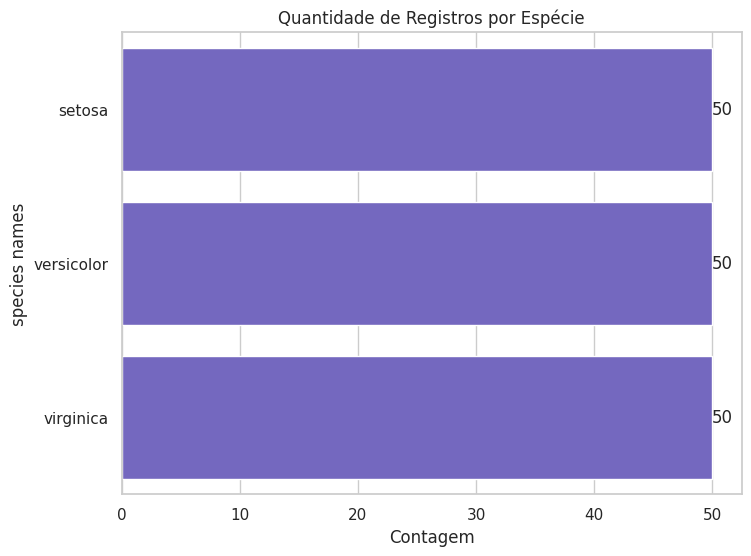

In [84]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
ax = sns.countplot(df_iris['species names'], color='SlateBlue')
ax.bar_label(ax.containers[0])
ax.set_xlabel('Contagem')
plt.title('Quantidade de Registros por Espécie')

plt.show()

##### Histogramas

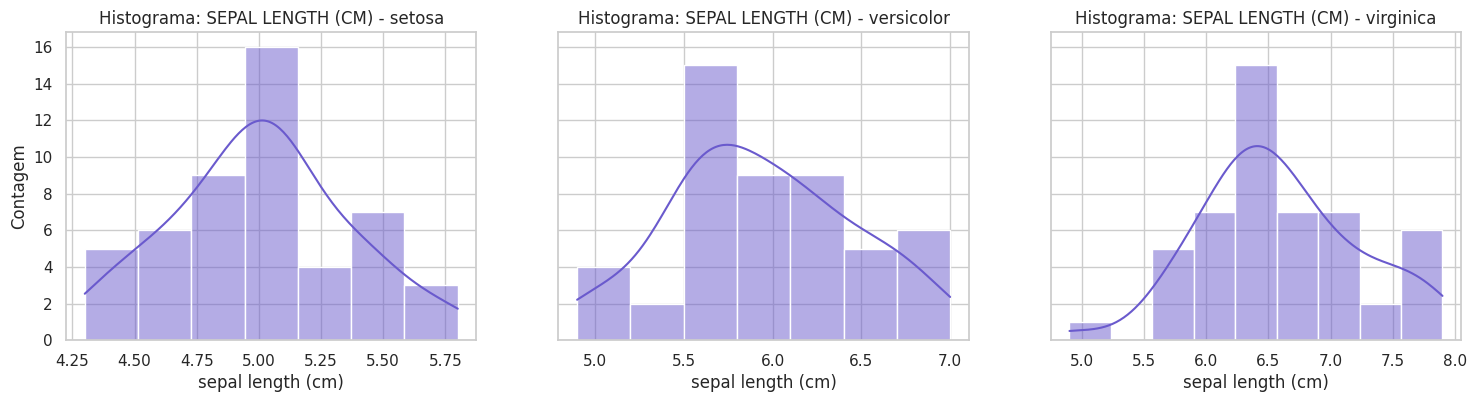

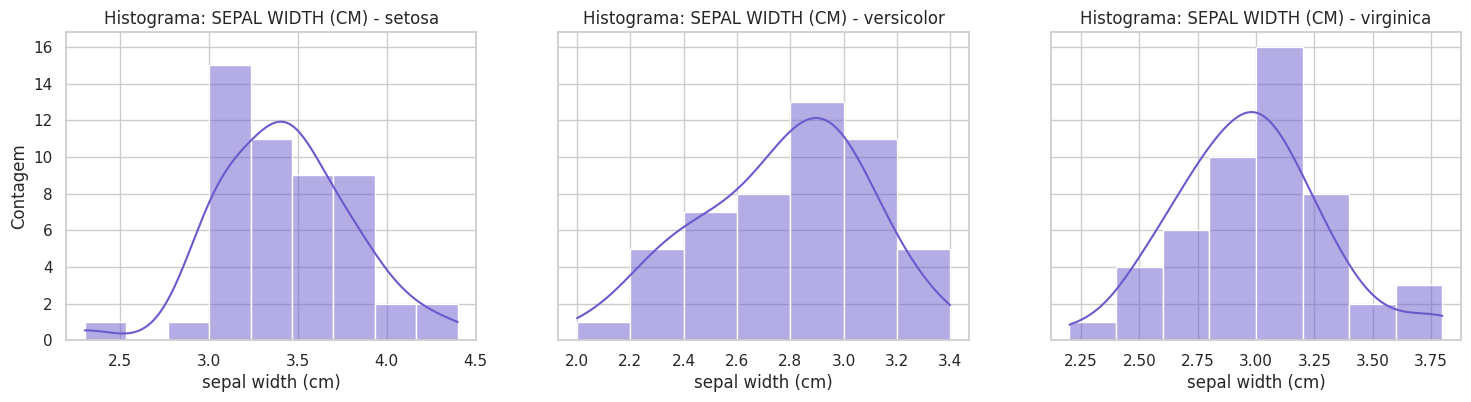

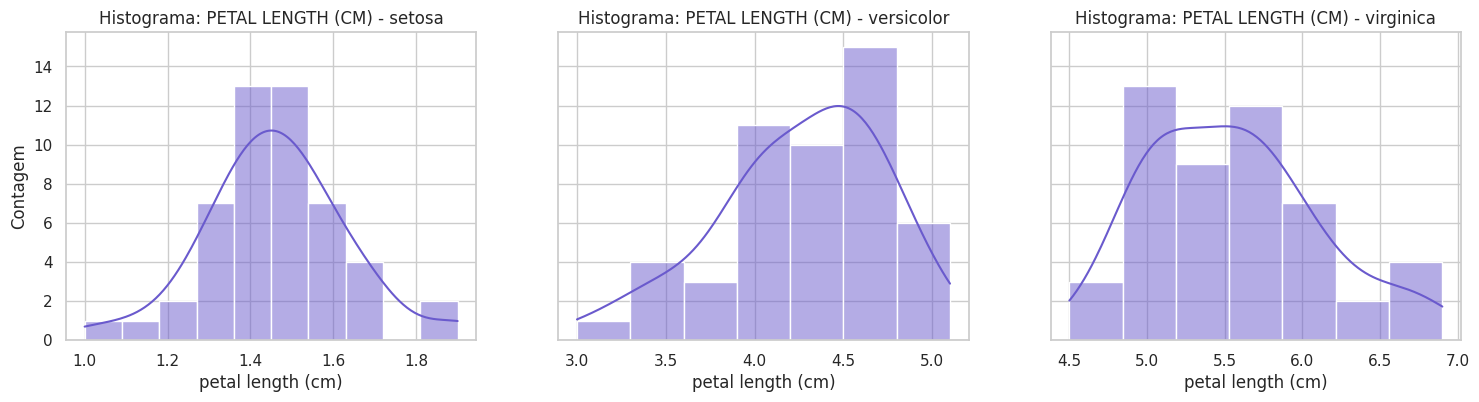

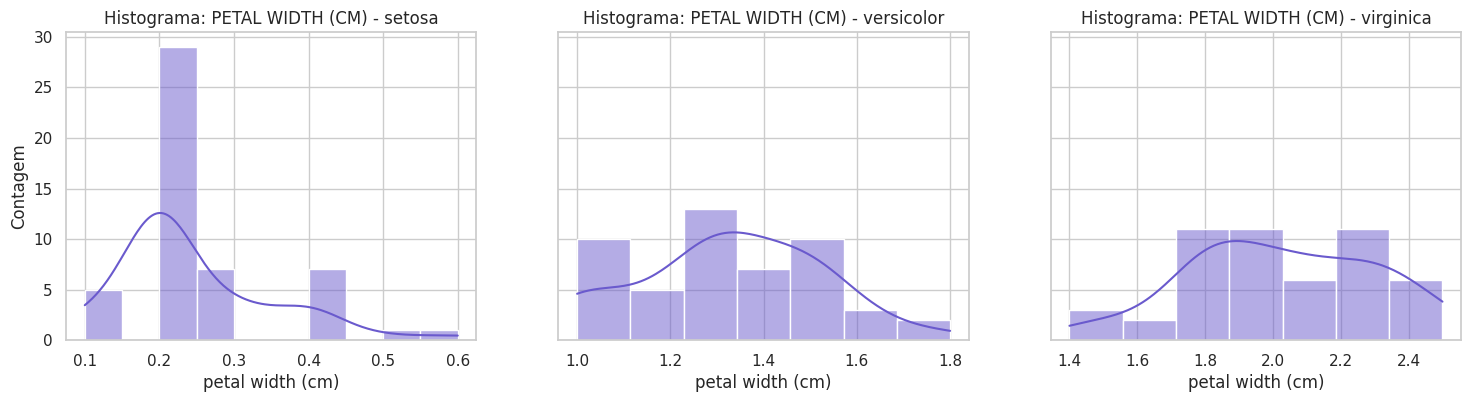

In [85]:
sns.set(style="whitegrid")

for I, coluna in enumerate(colunas_numericas):
  figura, eixos = plt.subplots(1, 3, figsize=(18, 4), sharey=True)

  for J, species in enumerate(valores_unicos_species):
    df_species = df_iris[df_iris['species names'] == species]

    sns.histplot(df_species[coluna], kde=True, ax=eixos[J], color='SlateBlue')
    eixos[J].set_title(f'Histograma: {coluna.upper()} - {species}')
    eixos[J].set_xlabel(coluna)
    eixos[J].set_ylabel('Contagem')

plt.show()

##### Boxplots

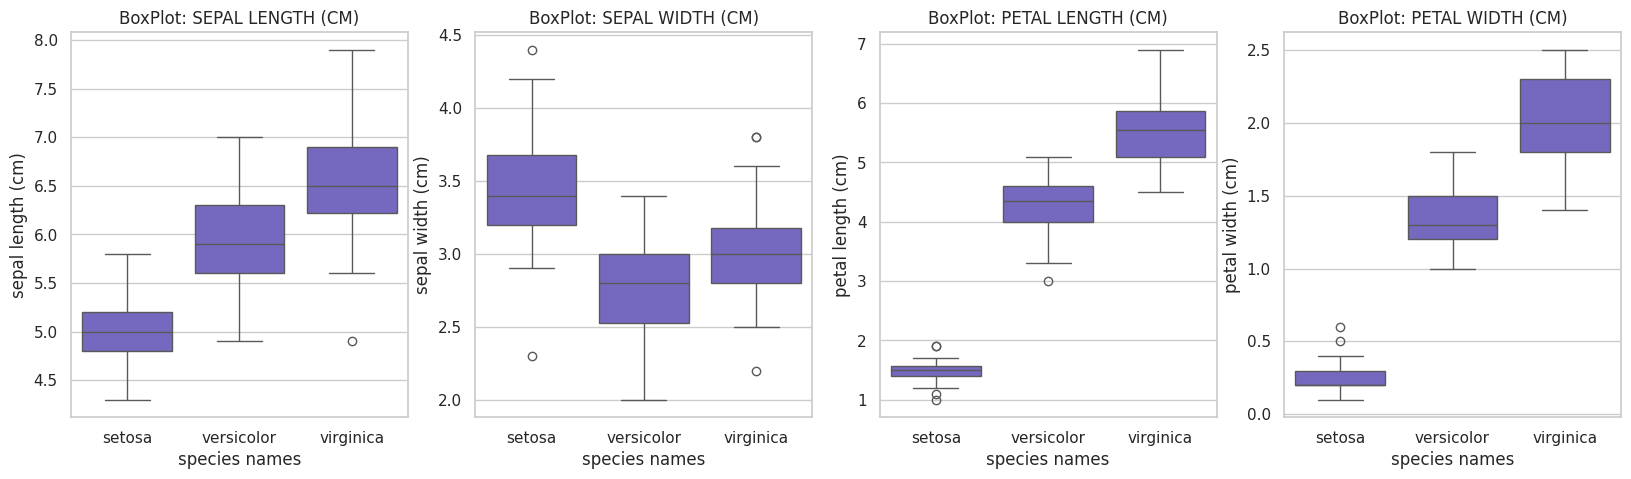

In [86]:
sns.set(style="whitegrid")

figura, eixos = plt.subplots(1, 4, figsize=(20, 5))

for I, coluna in enumerate(colunas_numericas):
  sns.boxplot(data=df_iris, x='species names', y=coluna, ax=eixos[I], color='SlateBlue')
  eixos[I].set_title(f'BoxPlot: {coluna.upper()}')

plt.show()

##### Gráficos emparelhados

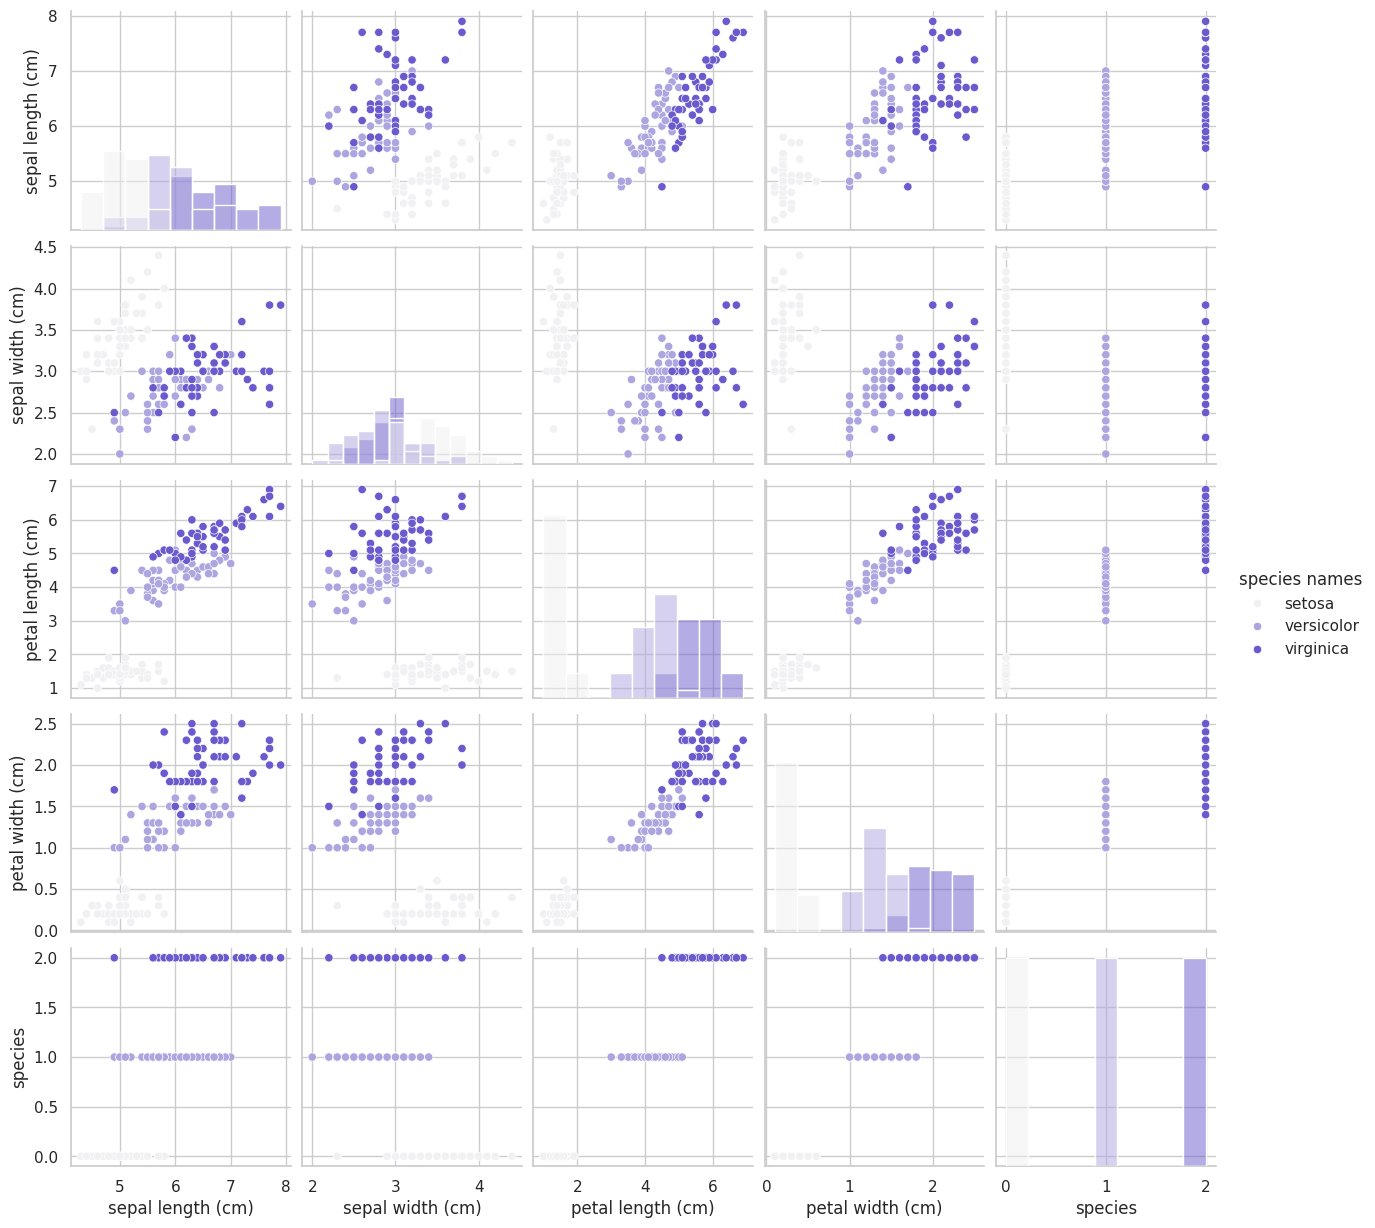

In [87]:
sns.pairplot(df_iris, hue='species names', diag_kind='hist', palette="light:#6A5ACD")

##### Métricas

In [88]:
for coluna in colunas_numericas:
  metricas = {
      'Media':     [],
      'Moda':      [],
      'Mediana':   [],
      'Desvio':    [],
      'Variância': [],
      'Amplitude': []
  }

  for species in valores_unicos_species:
    df_species = df_iris[df_iris['species names'] == species]

    media     = df_species[coluna].mean()
    moda      = df_species[coluna].mode()[0]
    mediana   = df_species[coluna].median()
    desvio    = df_species[coluna].std()
    variancia = df_species[coluna].var()
    Amplitude = df_species[coluna].max() - df_species[coluna].min()

    metricas['Media'].append(round(media, 2))
    metricas['Moda'].append(round(moda, 2))
    metricas['Mediana'].append(round(mediana, 2))
    metricas['Desvio'].append(round(desvio, 2))
    metricas['Variância'].append(round(variancia, 2))
    metricas['Amplitude'].append(round(Amplitude, 2))

  df_metricas = pd.DataFrame(metricas, index=valores_unicos_species)
  df_metricas = df_metricas.T

  print(f'Estatística Descritiva para: {coluna.upper()}\n{df_metricas}\n')

Estatística Descritiva para: SEPAL LENGTH (CM)
           setosa  versicolor  virginica
Media        5.01        5.94       6.59
Moda         5.00        5.50       6.30
Mediana      5.00        5.90       6.50
Desvio       0.35        0.52       0.64
Variância    0.12        0.27       0.40
Amplitude    1.50        2.10       3.00

Estatística Descritiva para: SEPAL WIDTH (CM)
           setosa  versicolor  virginica
Media        3.43        2.77       2.97
Moda         3.40        3.00       3.00
Mediana      3.40        2.80       3.00
Desvio       0.38        0.31       0.32
Variância    0.14        0.10       0.10
Amplitude    2.10        1.40       1.60

Estatística Descritiva para: PETAL LENGTH (CM)
           setosa  versicolor  virginica
Media        1.46        4.26       5.55
Moda         1.40        4.50       5.10
Mediana      1.50        4.35       5.55
Desvio       0.17        0.47       0.55
Variância    0.03        0.22       0.30
Amplitude    0.90        2.10       2.

#### C. Observando apenas esses gráficos, é possível identificar uma ou mais propriedades (`Sepal_Length`, `Sepal_Width`, `Petal_Length`, `Petal_Width`) que sejam suficientes para diferenciar entre as diferentes espécies?

##### **Conclusão:**

- *`Petal Length (cm)`*
  
  Setosa tem um comprimento de pétala significativamente menor (média de 1.46 cm) comparado a Versicolor (média de 4.26 cm) e Virginica (média de 5.55 cm).
A amplitude e desvio padrão também são muito menores para Setosa, indicando uma distribuição mais compacta.

- *`Petal Width (cm)`*
  
  Setosa também tem uma largura de pétala significativamente menor (média de 0.25 cm) comparada a Versicolor (média de 1.33 cm) e Virginica (média de 2.03 cm). As disparidades de tamanho entre as espécies são significativas o bastante para permitir uma separação clara.

- *`Sepal Length (cm)` e `Sepal Width (cm)`*

  Essas propriedades são menos eficientes para diferenciar Versicolor de Virginica, mas ainda são úteis para diferenciar Setosa das outras espécies. Setosa pode ser diferenciada, pois apresenta uma largura de sépala maior e um comprimento de sépala ligeiramente menor em comparação com as outras.

#### D. Aplique a regressão logística para avaliar o modelo de classificação.

##### Matriz de Correlação

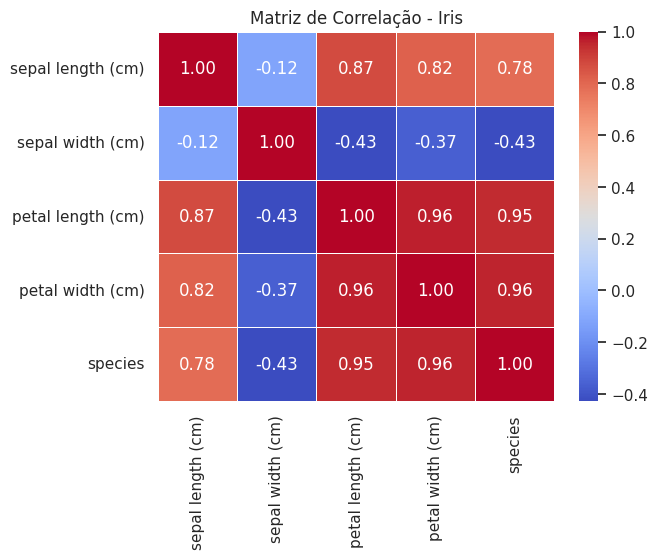

In [89]:
df_num = df_iris.select_dtypes(include=['int64', 'float64'])
corr   = df_num.corr()

# Plot
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação - Iris')
plt.show()

##### Regressão Logística

In [90]:
# Variável Alvo
y = df_iris['species']

# Variáveis explicativas
X = df_iris.drop(['species', 'species names'], axis=1)

# Separação dos DataFrames de Treino e Teste (80% treino e 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit do modelo
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Aplicação do modelo fitado na base Teste
y_pred       = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)

# Adicionando previsão e probabilidade na base Teste
X_test['previssão modelo']         = y_pred
X_test['prob. setosa']     = y_pred_proba[:, 0].round(2)
X_test['prob. versicolor'] = y_pred_proba[:, 1].round(2)
X_test['prob. virginica']  = y_pred_proba[:, 2].round(2)

# Saída
X_test.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),previssão modelo,prob. setosa,prob. versicolor,prob. virginica
141,6.9,3.1,5.1,2.3,2,0.00,0.16,0.84
132,6.4,2.8,5.6,2.2,2,0.00,0.04,0.96
18,5.7,3.8,1.7,0.3,0,0.95,0.05,0.00
82,5.8,2.7,3.9,1.2,1,0.03,0.95,0.03
131,7.9,3.8,6.4,2.0,2,0.00,0.03,0.97


#### E. Calcule a acurácia, precisão e recall.

In [91]:
accuracy         = metrics.accuracy_score(y_test, y_pred)
precision        = metrics.precision_score(y_test, y_pred, average='macro')
recall           = metrics.recall_score(y_test, y_pred, average='macro')
f1_score         = metrics.f1_score(y_test, y_pred, average='macro')
class_report     = metrics.classification_report(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

print(f'Acurácia...: {accuracy}')
print(f'Precisão...: {precision}')
print(f'Recall.....: {recall}')
print(f'F1 Score...: {f1_score}')

print(f'\nRelatório de Classificação\n{class_report}')

print(f'\nMatriz de Confusão\n{confusion_matrix}')

Acurácia...: 1.0
Precisão...: 1.0
Recall.....: 1.0
F1 Score...: 1.0

Relatório de Classificação
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Matriz de Confusão
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


#### F. Plote a matriz de confusão usando Matplotlib ou Seaborn.

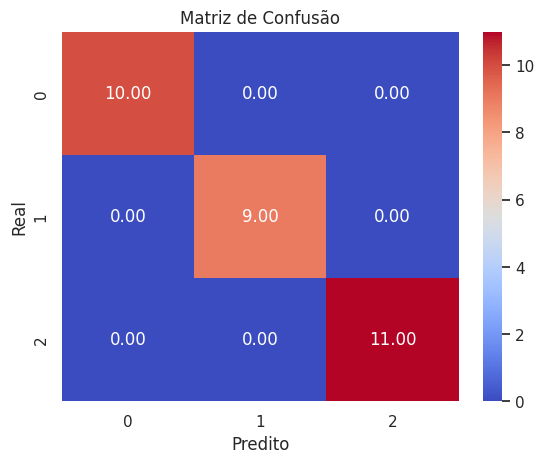

In [92]:
sns.heatmap(confusion_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')

plt.show()

## Proposta do Desafio - Parte II

**Utilizando o dataset `load_digits` da biblioteca sklearn, responda às perguntas abaixo.**

#### A. Faça uma análise inicial deste dataset:
	I. Quantos dados ele possui?
	II. Existem dados nulos? Se sim, quantos?
	III. Todos os dados são numéricos ou existem colunas com dados categóricos?

In [93]:
# Importação da base de dados
digits = datasets.load_digits()

df_digits = pd.DataFrame(digits.data, columns=digits.feature_names)

# Coluna alvo
df_digits['target'] = digits.target

# Visualizando os dados
df_digits.sample(5)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
1430,0.0,0.0,11.0,10.0,8.0,12.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,14.0,16.0,14.0,7.0,0.0,0.0,5
1127,0.0,0.0,0.0,9.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,13.0,0.0,0.0,0.0,4
602,0.0,0.0,4.0,13.0,14.0,16.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,13.0,1.0,0.0,0.0,0.0,7
334,0.0,0.0,3.0,11.0,16.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,14.0,9.0,0.0,0.0,0
754,0.0,0.0,1.0,9.0,15.0,12.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,0.0,7


In [94]:
# Quantidade de registros
print(f'Quantidade de registros: {df_digits.shape[0]}')

Quantidade de registros: 1797


In [95]:
# Quantidade de colunas
print(f'Quantidade de colunas: {df_digits.shape[1]}')

Quantidade de colunas: 65


In [96]:
# Tipos de variáveis
df_digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [97]:
# Estatísticas descritivas - variáveis numéricas
df_digits.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [98]:
# Valores faltantes
df_digits.isnull().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
target       0
Length: 65, dtype: int64

##### Dígitos

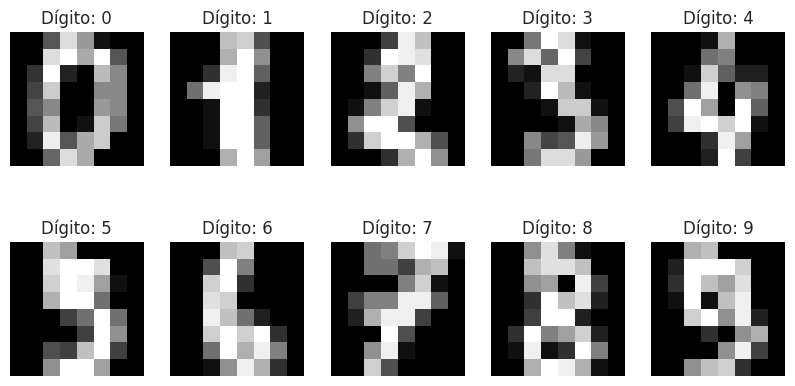

In [99]:
def plot_digits(images, labels):
  plt.figure(figsize=(10, 5))
  for I in range(10):
    image = images[labels == I][0]
    ax = plt.subplot(2, 5, I + 1)
    ax.set_title(f'Dígito: {I}')
    ax.imshow(image, cmap='gray')
    ax.axis('off')
  plt.show()

# Chama função para plotar os dígitos
plot_digits(digits.images, digits.target)

#### B. Aplique a regressão logística para avaliar o modelo de classificação.

In [100]:
# Variável Alvo
y = df_digits['target']

# Variáveis explicativas
X = df_digits.drop(['target'], axis=1)

# Separação dos DataFrames de Treino e Teste (80% treino e 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit do modelo
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Aplicação do modelo fitado na base Teste
y_pred       = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)

# Adicionando previsão e probabilidade na base Teste
X_test['previsao_modelo'] = y_pred
X_test['probabilidade_modelo'] = y_pred_proba.max(axis=1).round(2)

# Saída
X_test[['previsao_modelo', 'probabilidade_modelo']].sample(5)

,previsao_modelo,probabilidade_modelo
669,3,1.00
730,2,0.98
124,4,1.00
270,4,1.00
123,8,0.99


#### C. Calcule a acurácia, precisão e recall.

In [101]:
accuracy         = metrics.accuracy_score(y_test, y_pred)
precision        = metrics.precision_score(y_test, y_pred, average='macro')
recall           = metrics.recall_score(y_test, y_pred, average='macro')
f1_score         = metrics.f1_score(y_test, y_pred, average='macro')
class_report     = metrics.classification_report(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

print(f'Acurácia...: {accuracy}')
print(f'Precisão...: {precision}')
print(f'Recall.....: {recall}')
print(f'F1 Score...: {f1_score}')

print(f'\nRelatório de Classificação\n{class_report}')

print(f'\nMatriz de Confusão\n{confusion_matrix}')

Acurácia...: 0.9694444444444444
Precisão...: 0.9708830464104297
Recall.....: 0.9721963660579865
F1 Score...: 0.9713725658623401

Relatório de Classificação
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.96      0.98        46
           5       0.92      0.94      0.93        47
           6       0.94      0.97      0.96        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360


Matriz de Confusão
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]

#### D. Plote a matriz de confusão usando Matplotlib ou Seaborn.

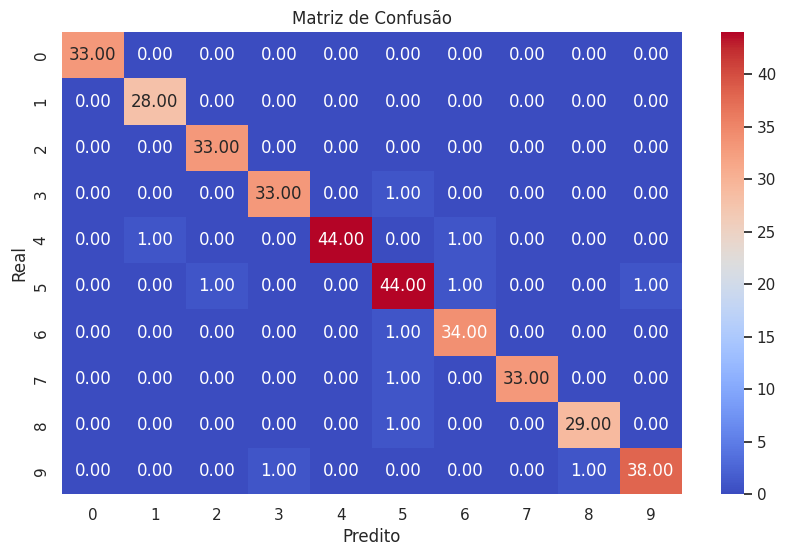

In [102]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')

plt.show()